Given an input geotiff we create chips of the geotiff

In [1]:
# !pip install -r requirements.txt

In [2]:
import numpy as np
import rasterio
from rasterio.plot import show

In [3]:
def trainchips(img_filepath: str, stride: int, winsize: int):
    """
    Given a geotiff, chip into n chipped geotiffs of size winsize and stride
    """
    image = rasterio.open(img_filepath)
    imgarr = image.read()
    print(f"Shape of training data  is: {imgarr.shape}")

    written_files = []
    index = 0
    for i in np.arange(0, imgarr.shape[1], stride):
        for j in np.arange(0, imgarr.shape[2], stride):
            img = imgarr[:, i:i+winsize, j:j+winsize]
            x, y = (j*image.transform[0] + image.transform[2]), (image.transform[5] + i*image.transform[4])
            out_transform = [image.transform[0], 0, x, 0, image.transform[4], y]
            out_filename = f"chips/{str(index)}_img.tif"
            with rasterio.open(out_filename, "w", driver='GTiff', count=imgarr.shape[0], dtype=imgarr.dtype,
                         width=winsize, height=winsize, transform = out_transform, crs = image.crs) as raschip:
                         raschip.write(img)
            index += 1
            written_files.append(out_filename)      
    return written_files

In [4]:
stride = 32
winsize = 64
in_file = "example.tif"
imgchips = trainchips(in_file, stride, winsize)

Shape of training data  is: (3, 673, 854)


In [5]:
rasterio.open(in_file).transform

Affine(2.9967798594816726e-06, 0.0, 32.661287416,
       0.0, -2.996780089151555e-06, 39.950163189)

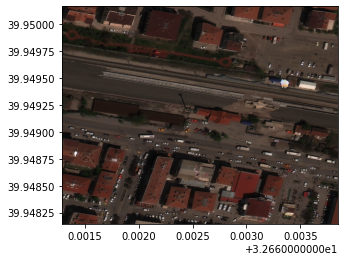

<AxesSubplot:>

In [6]:
show(rasterio.open(in_file))

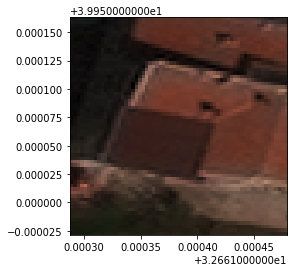

<AxesSubplot:>

In [7]:
show(rasterio.open(imgchips[0]))